# Team H Capstone Project
## Year-Long Data Engineering Project: The Journey of a New Data Engineer
 Welcome to XYZ Company!

 You have just joined as a Data Engineer, and your first year will be an exciting journey full of learning and challenges. You'll work on a sales dataset to simulate real-world tasks and projects. This journey will help you hone your skills in data cleaning, data ingestion, transformation, warehousing, and visualization. Let's get started!

# Phase 1: Initial Data Understanding and Cleaning

/var/folders/6w/pgggx3ps78qg7z7n94y9fl1m0000gn/T/ipykernel_44582/2831278896.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_purchase.index, y=average_purchase.values, palette=['orange']*len(average_purchase))


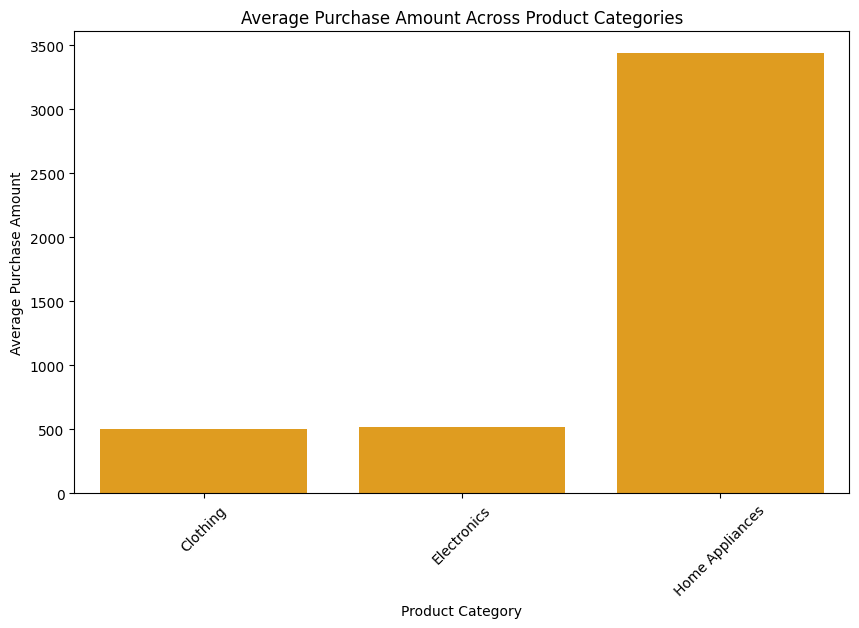

ProductCategory
Clothing            504.745259
Electronics         519.531507
Home Appliances    3438.390432
Name: PurchaseAmount, dtype: float64


In [22]:
# Problem Statement 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from the CSV file
file_path = '/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Final/Sales Dataset.csv'
data = pd.read_csv(file_path)

# Convert columns to appropriate data types
data['PurchaseAmount'] = pd.to_numeric(data['PurchaseAmount'], errors='coerce')

# Handle missing values
data = data.dropna(subset=['PurchaseAmount', 'ProductCategory'])

# Calculate the average purchase amount for each product category
average_purchase = data.groupby('ProductCategory')['PurchaseAmount'].mean()

# Visualization of mean purchase amounts 
plt.figure(figsize=(10, 6))
sns.barplot(x=average_purchase.index, y=average_purchase.values, palette=['orange']*len(average_purchase))
plt.title('Average Purchase Amount Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.show()

print(average_purchase)


/var/folders/6w/pgggx3ps78qg7z7n94y9fl1m0000gn/T/ipykernel_44582/1591195522.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=average_rating.index, y=average_rating.values, palette='viridis')


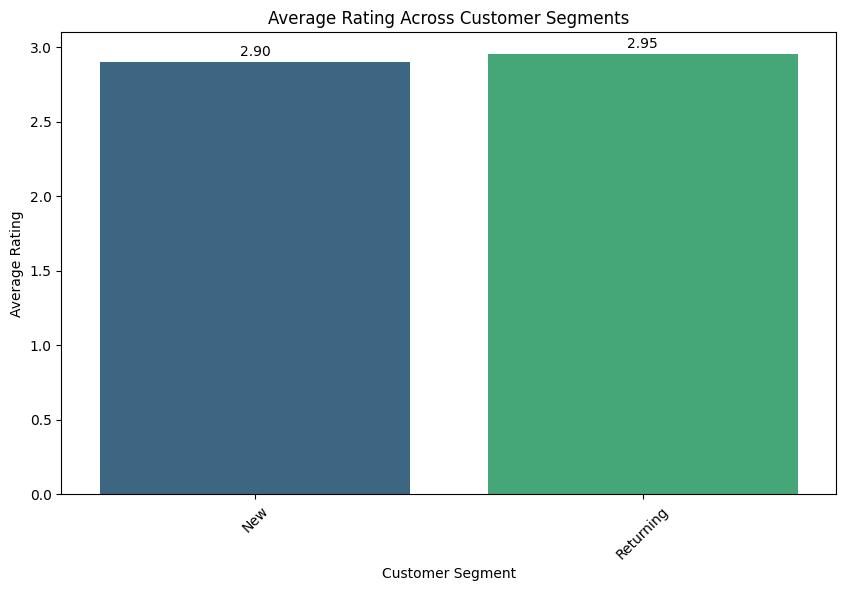

Average Rating per Customer Segment:
 CustomerSegment
New          2.898990
Returning    2.953642
Name: Rating, dtype: float64


In [23]:
# Problem Statement 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from the CSV file
file_path = '/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Final/Sales Dataset.csv'
data = pd.read_csv(file_path)

# Convert columns to appropriate data types
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Handle missing values in the Rating column
data = data.dropna(subset=['Rating', 'CustomerSegment'])

# Calculate the average rating for each customer segment
average_rating = data.groupby('CustomerSegment')['Rating'].mean()

# Visualization of average ratings across customer segments
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=average_rating.index, y=average_rating.values, palette='viridis')
plt.title('Average Rating Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# Annotate the highest and lowest ratings
for index, value in enumerate(average_rating):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

print("Average Rating per Customer Segment:\n", average_rating)


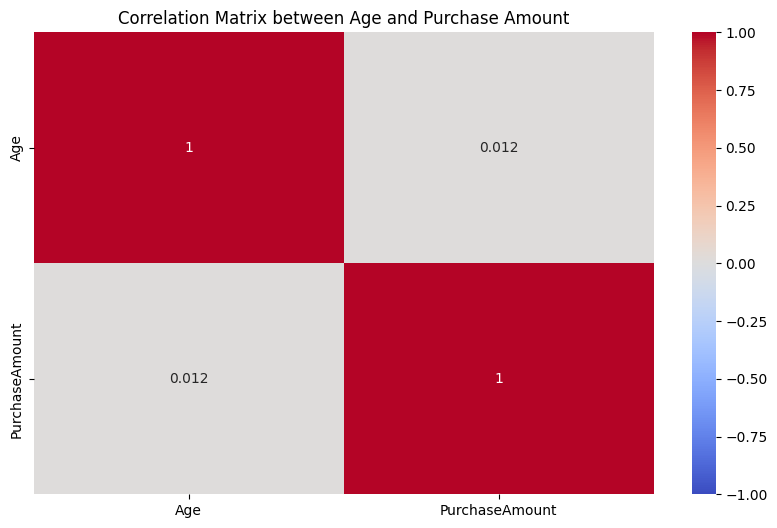

Correlation matrix:
                      Age  PurchaseAmount
Age             1.000000        0.011542
PurchaseAmount  0.011542        1.000000


In [24]:
# Problem Statement 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Final/Sales Dataset.csv'
data = pd.read_csv(file_path)

# Select relevant columns for correlation analysis
correlation_data = data[['Age', 'PurchaseAmount']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Age and Purchase Amount')
plt.show()

print("Correlation matrix:\n", correlation_matrix)


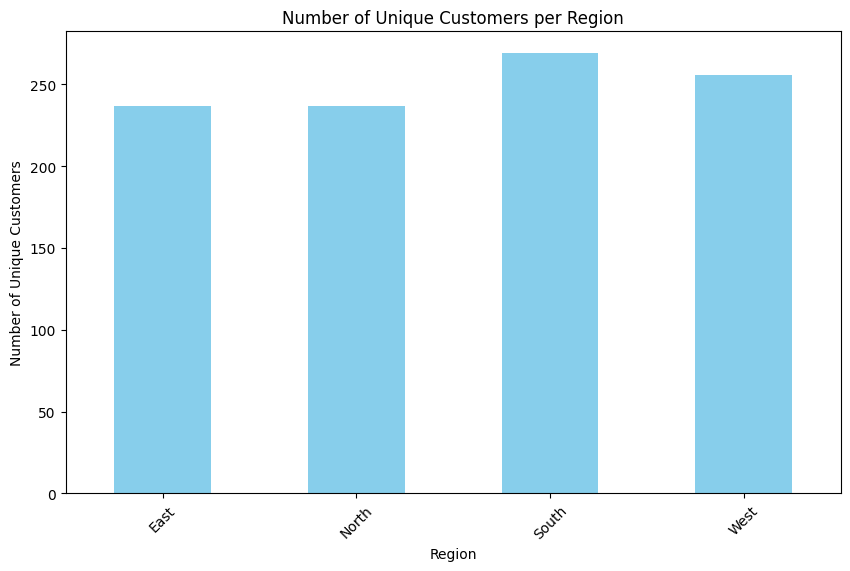

Total number of unique customers: 998
Unique Customers per Region:
 Region
East     237
North    237
South    269
West     256
Name: CustomerID, dtype: int64


In [25]:
# Problem Statement 4
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
file_path = '/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Final/Sales Dataset.csv'
data = pd.read_csv(file_path)

# Count unique customers per region
unique_customers_per_region = data.groupby('Region')['CustomerID'].nunique()

# Plot bar chart
plt.figure(figsize=(10, 6))
unique_customers_per_region.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.show()

print("Total number of unique customers:", data['CustomerID'].nunique())
print("Unique Customers per Region:\n", unique_customers_per_region)


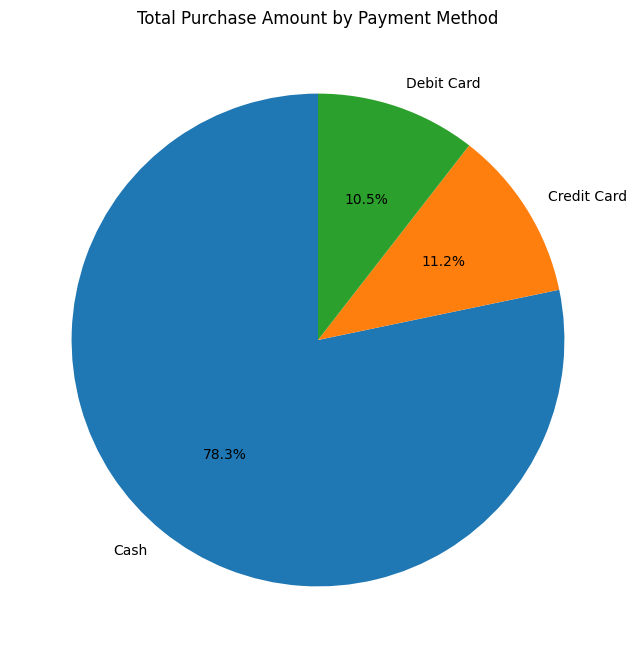

Total Purchase Amount per Payment Method:
 PaymentMethod
Cash           1.175127e+06
Credit Card    1.684361e+05
Debit Card     1.578262e+05
Name: PurchaseAmount, dtype: float64


In [26]:
# Problem Statement 5
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
file_path = '/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Final/Sales Dataset.csv'
data = pd.read_csv(file_path)

# Total purchase amount per payment method
total_purchase_per_payment_method = data.groupby('PaymentMethod')['PurchaseAmount'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
total_purchase_per_payment_method.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Purchase Amount by Payment Method')
plt.ylabel('')
plt.show()

print("Total Purchase Amount per Payment Method:\n", total_purchase_per_payment_method)


# Phase 2: Data Ingestion Strategies 

In [27]:
# Problem Statement 6
import pandas as pd
from sqlalchemy import create_engine

# Load CSV into DataFrame
file_path = '/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Final/Sales Dataset.csv'
sales_df = pd.read_csv(file_path)

# Database connection string
db_engine = create_engine('sqlite:///sales.db')

# Extract, transform, and load data
sales_df.to_sql('salesdata', db_engine, if_exists='replace', index=False)

# Verify data load
result = pd.read_sql('SELECT * FROM salesdata LIMIT 5', db_engine)
print(result)


   Unnamed: 0  CustomerID   Age  Gender Location  ProductCategory  \
0           0           1  56.0    Male   Suburb         Clothing   
1           1           2  46.0  Female    Rural  Home Appliances   
2           2           3   NaN  Female   Suburb  Home Appliances   
3           3           4  60.0  Female   Suburb      Electronics   
4           4          10  25.0    Male   Suburb         Clothing   

  PurchaseDate  PurchaseAmount PaymentMethod  Quantity  DiscountPercentage  \
0   2022-01-01     -100.000000    Debit Card         5            0.300396   
1   2022-01-02   999999.000000          Cash         5            0.350433   
2   2022-01-03      955.564055    Debit Card         8            0.142603   
3   2022-01-04      527.350833          Cash         9            0.315385   
4   2022-01-10      306.570021   Credit Card         9            0.227825   

   IsReturned  Rating  IsPromotion CustomerSegment  ShippingDuration Region  \
0           0       2            0   

In [28]:
# Problem Statement 7
from sqlalchemy import create_engine
import pandas as pd

# Database connection
engine = create_engine('sqlite:///sales.db')

# Example SQL ingestion
sales_df.to_sql('salesdata', engine, if_exists='replace', index=False)

# Verify data was written
query_result = pd.read_sql('SELECT * FROM salesdata LIMIT 5', engine)
print(query_result)


   Unnamed: 0  CustomerID   Age  Gender Location  ProductCategory  \
0           0           1  56.0    Male   Suburb         Clothing   
1           1           2  46.0  Female    Rural  Home Appliances   
2           2           3   NaN  Female   Suburb  Home Appliances   
3           3           4  60.0  Female   Suburb      Electronics   
4           4          10  25.0    Male   Suburb         Clothing   

  PurchaseDate  PurchaseAmount PaymentMethod  Quantity  DiscountPercentage  \
0   2022-01-01     -100.000000    Debit Card         5            0.300396   
1   2022-01-02   999999.000000          Cash         5            0.350433   
2   2022-01-03      955.564055    Debit Card         8            0.142603   
3   2022-01-04      527.350833          Cash         9            0.315385   
4   2022-01-10      306.570021   Credit Card         9            0.227825   

   IsReturned  Rating  IsPromotion CustomerSegment  ShippingDuration Region  \
0           0       2            0   

In [29]:
# Problem Statement 8
import pandas as pd

# Example of chunking CSV ingestion
chunk_size = 10000
chunks = pd.read_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Final/Sales Dataset.csv", chunksize=chunk_size)
for chunk in chunks:
    chunk.to_sql('salesdata', engine, if_exists='append', index=False)


# Phase 3: Data Transformation 

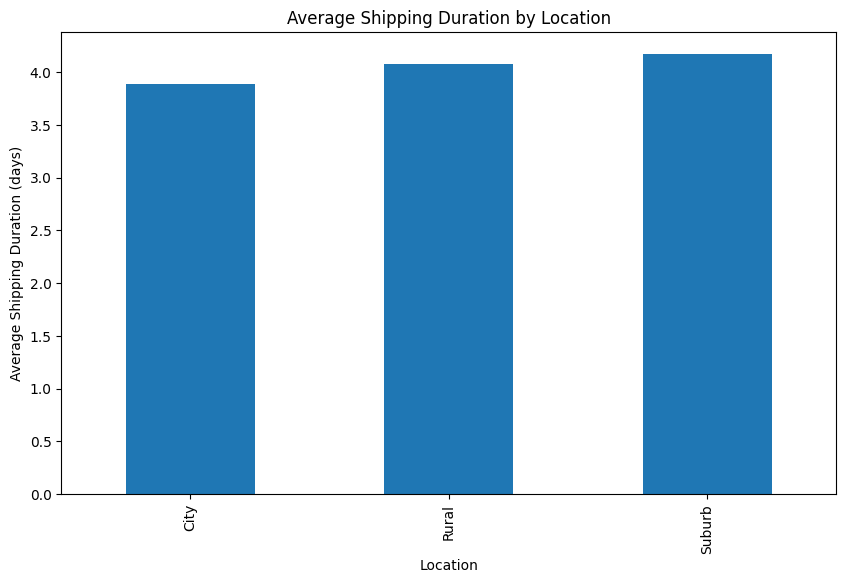

Average Shipping Duration per Location:
 Location
City      3.886628
Rural     4.081433
Suburb    4.172414
Name: ShippingDuration, dtype: float64


In [30]:
# Problem Statement 9
import pandas as pd
import matplotlib.pyplot as plt

# Average shipping duration per location
avg_shipping_duration_per_location = sales_df.groupby('Location')['ShippingDuration'].mean()

plt.figure(figsize=(10, 6))
avg_shipping_duration_per_location.plot(kind='bar')
plt.title('Average Shipping Duration by Location')
plt.ylabel('Average Shipping Duration (days)')
plt.show()

print("Average Shipping Duration per Location:\n", avg_shipping_duration_per_location)


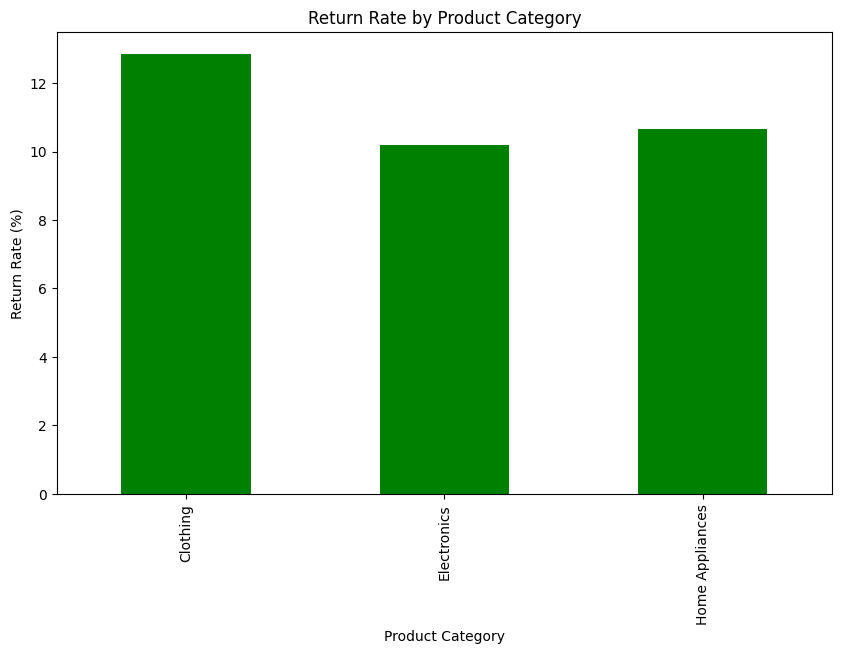

Return Rate per Product Category:
 ProductCategory
Clothing           12.852665
Electronics        10.204082
Home Appliances    10.650888
Name: IsReturned, dtype: float64


In [31]:
# Problem Statement 10
import matplotlib.pyplot as plt

# Return rate per product category
return_rate_per_category = sales_df.groupby('ProductCategory')['IsReturned'].mean() * 100
plt.figure(figsize=(10, 6))
return_rate_per_category.plot(kind='bar', color='green')
plt.title('Return Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Return Rate (%)')
plt.show()

print("Return Rate per Product Category:\n", return_rate_per_category)


In [32]:
# Problem Statement 11
import pandas as pd

# Number of purchases per customer
purchase_count_per_customer = sales_df.groupby('CustomerID').size()

print("Purchase Count per Customer:\n", purchase_count_per_customer)


Purchase Count per Customer:
 CustomerID
1       1
2       1
3       1
4       1
7       1
       ..
996     1
997     1
998     1
999     1
1000    1
Length: 998, dtype: int64


/var/folders/6w/pgggx3ps78qg7z7n94y9fl1m0000gn/T/ipykernel_44582/1074385214.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_per_age_group = sales_df.groupby('AgeGroup')['PurchaseAmount'].mean()


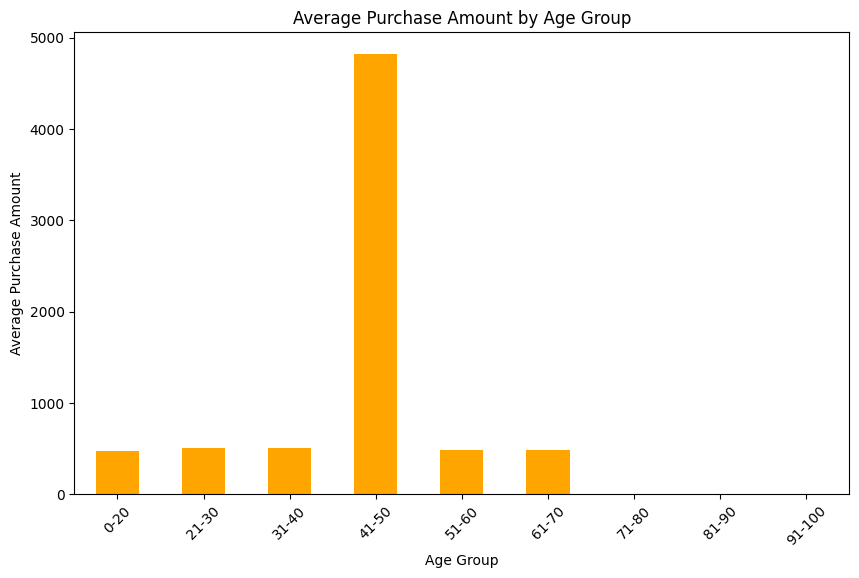

Average Purchase Amount per Age Group:
 AgeGroup
0-20       472.734226
21-30      502.004351
31-40      505.949538
41-50     4818.914150
51-60      479.854446
61-70      488.191413
71-80             NaN
81-90             NaN
91-100            NaN
Name: PurchaseAmount, dtype: float64


In [33]:
# Problem Statement 12
import pandas as pd
import matplotlib.pyplot as plt

# Average purchase amount per age group
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
sales_df['AgeGroup'] = pd.cut(sales_df['Age'], bins=age_bins, labels=age_labels, right=False)
avg_purchase_per_age_group = sales_df.groupby('AgeGroup')['PurchaseAmount'].mean()

plt.figure(figsize=(10, 6))
avg_purchase_per_age_group.plot(kind='bar', color='orange')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.show()

print("Average Purchase Amount per Age Group:\n", avg_purchase_per_age_group)


# Phase 4: Data Warehousing 

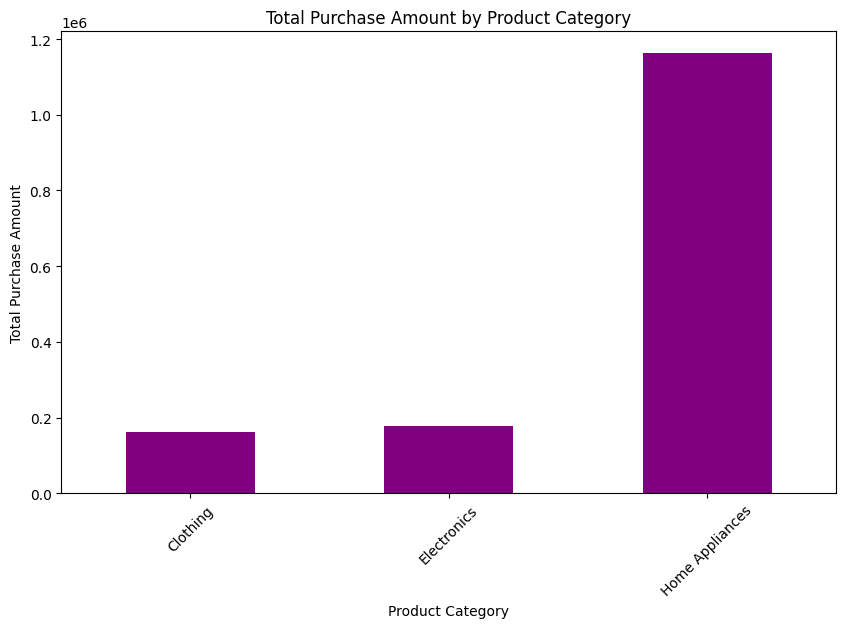

Total Purchase Amount per Product Category:
 ProductCategory
Clothing           1.610137e+05
Electronics        1.781993e+05
Home Appliances    1.162176e+06
Name: PurchaseAmount, dtype: float64


In [34]:
# Problem Statement 13
import pandas as pd
import matplotlib.pyplot as plt

# Total purchase amount per product category
total_purchase_per_category = sales_df.groupby('ProductCategory')['PurchaseAmount'].sum()

plt.figure(figsize=(10, 6))
total_purchase_per_category.plot(kind='bar', color='purple')
plt.title('Total Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

print("Total Purchase Amount per Product Category:\n", total_purchase_per_category)


In [35]:
# Problem Statement 14
import pandas as pd

# Number of purchases per product category
purchase_count_per_category = sales_df.groupby('ProductCategory').size()

print("Purchase Count per Product Category:\n", purchase_count_per_category)


Purchase Count per Product Category:
 ProductCategory
Clothing           319
Electronics        343
Home Appliances    338
dtype: int64


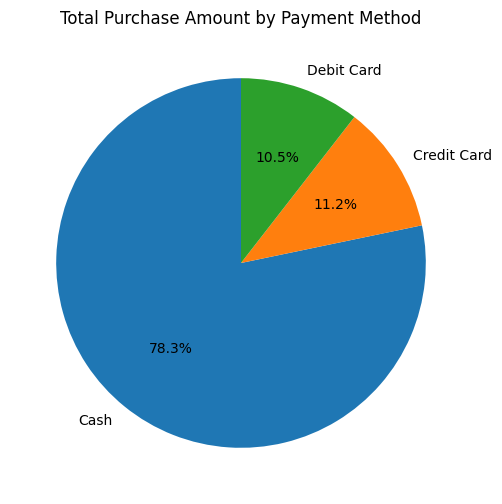

Total Purchase Amount per Payment Method:
 PaymentMethod
Cash           1.175127e+06
Credit Card    1.684361e+05
Debit Card     1.578262e+05
Name: PurchaseAmount, dtype: float64


In [36]:
# Problem Statement 15
import pandas as pd
import matplotlib.pyplot as plt

# Total purchase amount per payment method
total_purchase_per_payment_method = sales_df.groupby('PaymentMethod')['PurchaseAmount'].sum()

plt.figure(figsize=(8, 6))
total_purchase_per_payment_method.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Purchase Amount by Payment Method')
plt.ylabel('')
plt.show()

print("Total Purchase Amount per Payment Method:\n", total_purchase_per_payment_method)


# Phase 5: Reporting and Visualization 

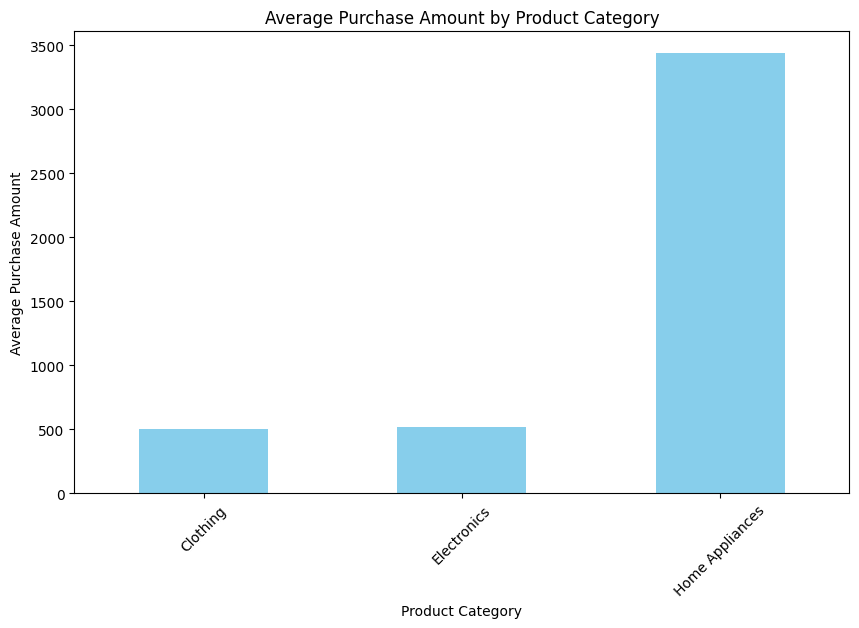

Average Purchase Amount per Product Category:
 ProductCategory
Clothing            504.745259
Electronics         519.531507
Home Appliances    3438.390432
Name: PurchaseAmount, dtype: float64


In [37]:
# Problem Statement 16
import pandas as pd
import matplotlib.pyplot as plt

# Average purchase amount per product category
avg_purchase_per_category = sales_df.groupby('ProductCategory')['PurchaseAmount'].mean()

plt.figure(figsize=(10, 6))
avg_purchase_per_category.plot(kind='bar', color='skyblue')
plt.title('Average Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.show()

print("Average Purchase Amount per Product Category:\n", avg_purchase_per_category)


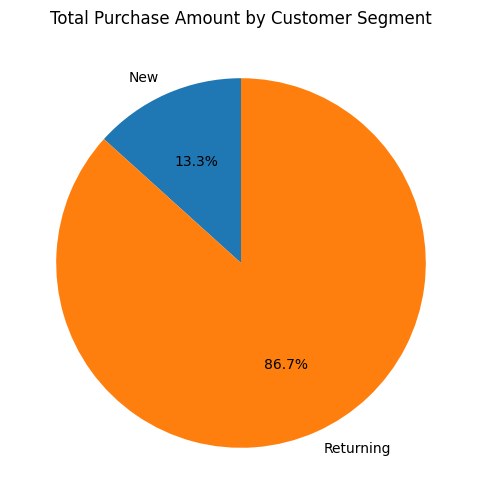

Total Purchase Amount per Customer Segment:
 CustomerSegment
New          1.997398e+05
Returning    1.301649e+06
Name: PurchaseAmount, dtype: float64


In [38]:
# Problem Statement 17
import pandas as pd
import matplotlib.pyplot as plt

# Total purchase amount per customer segment
total_purchase_per_segment = sales_df.groupby('CustomerSegment')['PurchaseAmount'].sum()

plt.figure(figsize=(8, 6))
total_purchase_per_segment.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Purchase Amount by Customer Segment')
plt.ylabel('')
plt.show()

print("Total Purchase Amount per Customer Segment:\n", total_purchase_per_segment)


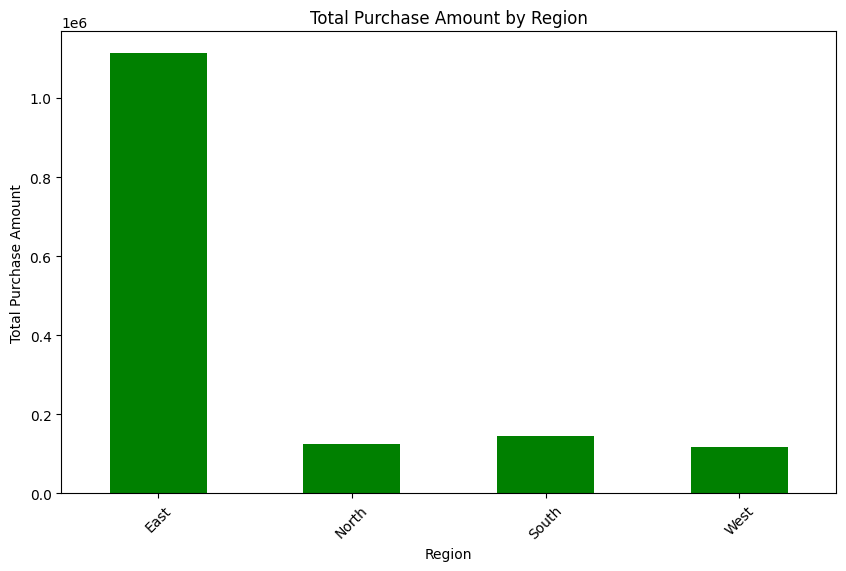

Total Purchase Amount per Region:
 Region
East     1.112838e+06
North    1.239074e+05
South    1.461941e+05
West     1.184497e+05
Name: PurchaseAmount, dtype: float64


In [39]:
# Problem Statement 18
import pandas as pd
import matplotlib.pyplot as plt

# Total purchase amount per region
total_purchase_per_region = sales_df.groupby('Region')['PurchaseAmount'].sum()

plt.figure(figsize=(10, 6))
total_purchase_per_region.plot(kind='bar', color='green')
plt.title('Total Purchase Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

print("Total Purchase Amount per Region:\n", total_purchase_per_region)


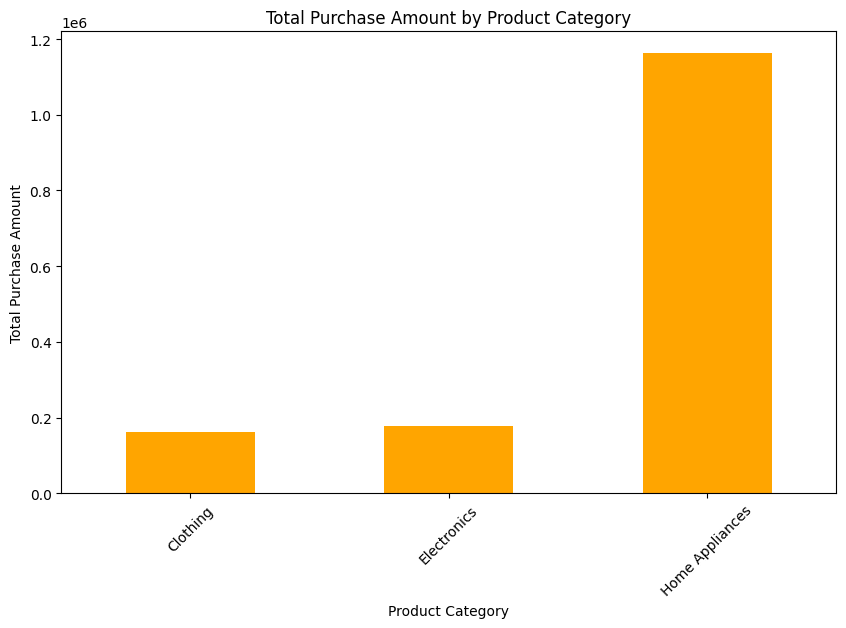

Total Purchase Amount per Product Category:
 ProductCategory
Clothing           1.610137e+05
Electronics        1.781993e+05
Home Appliances    1.162176e+06
Name: PurchaseAmount, dtype: float64


In [40]:
# Problem Statement 19
import pandas as pd
import matplotlib.pyplot as plt

# Total purchase amount per product category
total_purchase_per_category = sales_df.groupby('ProductCategory')['PurchaseAmount'].sum()

plt.figure(figsize=(10, 6))
total_purchase_per_category.plot(kind='bar', color='orange')
plt.title('Total Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

print("Total Purchase Amount per Product Category:\n", total_purchase_per_category)


In [41]:
# Problem Statement 20
import pandas as pd

# Count of customers per age group
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
sales_df['AgeGroup'] = pd.cut(sales_df['Age'], bins=age_bins, labels=age_labels, right=False)
customer_count_per_age_group = sales_df.groupby('AgeGroup')['CustomerID'].nunique()

print("Customer Count per Age Group:\n", customer_count_per_age_group)


Customer Count per Age Group:
 AgeGroup
0-20       49
21-30     205
31-40     192
41-50     233
51-60     219
61-70     100
71-80       0
81-90       0
91-100      0
Name: CustomerID, dtype: int64


/var/folders/6w/pgggx3ps78qg7z7n94y9fl1m0000gn/T/ipykernel_44582/3671715422.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_count_per_age_group = sales_df.groupby('AgeGroup')['CustomerID'].nunique()
